In [1]:
from ipywidgets import interact , interactive
from IPython.display import clear_output , display, HTML

In [2]:
import numpy as np 
from scipy import integrate
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [3]:
def solve_lorentz (N = 10 , angle = 0.0, max_time = 4.0, sigma = 10.0, beta = 8./3 , rho = 28.0) :
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1], projection = '3d')
    ax.axis('off')
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5,55))
    def lorenz_deriv(x_y_z , t0 , sigma = sigma , beta = beta, rho = rho):
        x,y,z = x_y_z
        return [sigma * (y-x) , x * (rho -z) , (x*y) - beta*z]
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    t = np.linspace(0, max_time, int(250 * max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t) for x0i in x0])
    colors = plt.cm.jet(np.linspace(0,1,N))
    for i in range(N) :
        x, y , z = x_t[i, :, :].T
        lines = ax.plot(x,y,z, '-', c = colors[i])
        _ = plt.setp(lines , linewidth = 2)
    ax.view_init(30, angle)
    _ = plt.show()
    return t, x_t

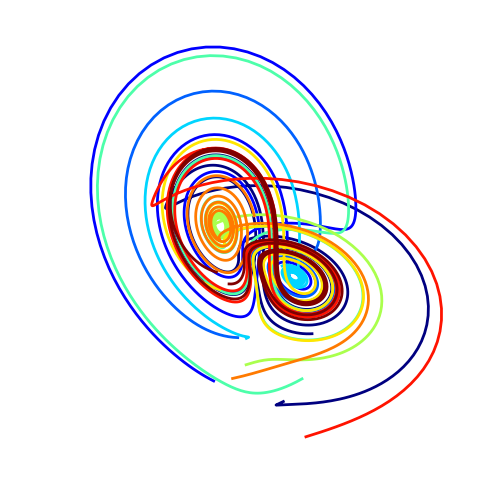

In [4]:
t , x_t = solve_lorentz(angle=0, N = 10)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

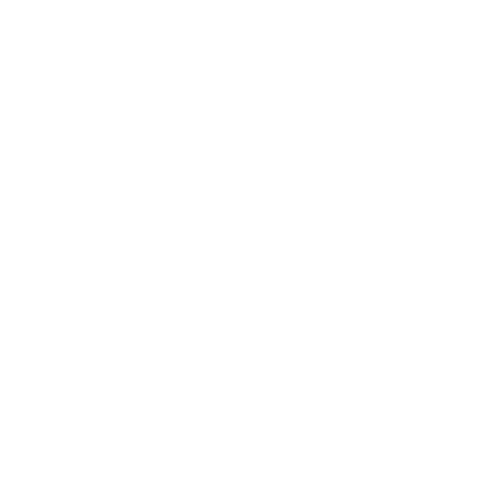

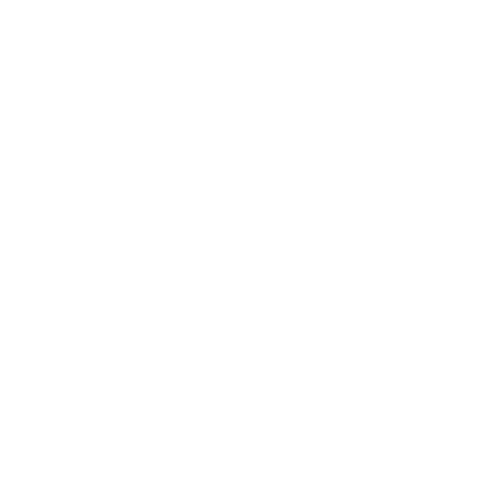

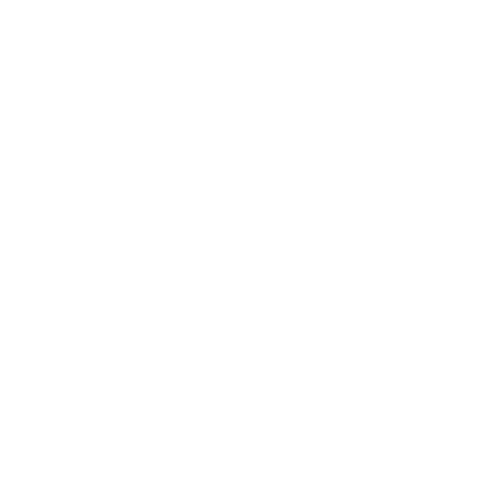

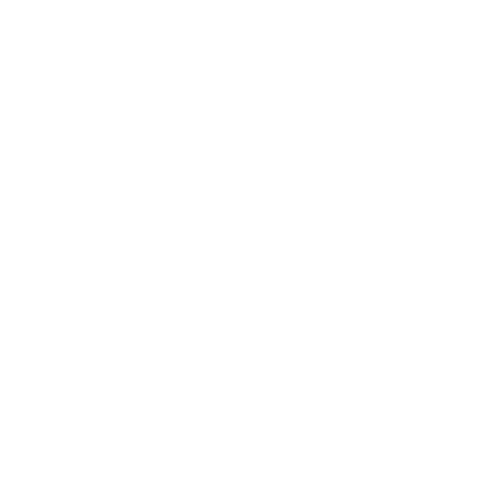

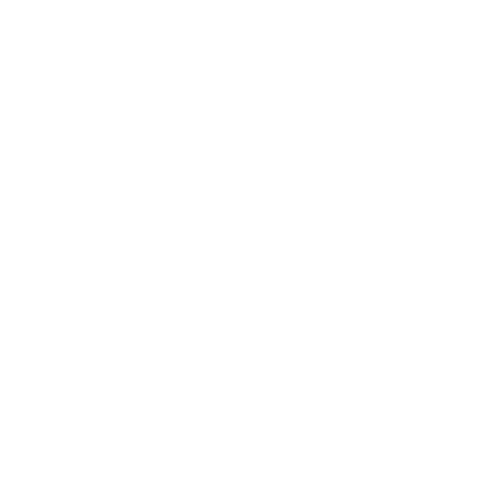

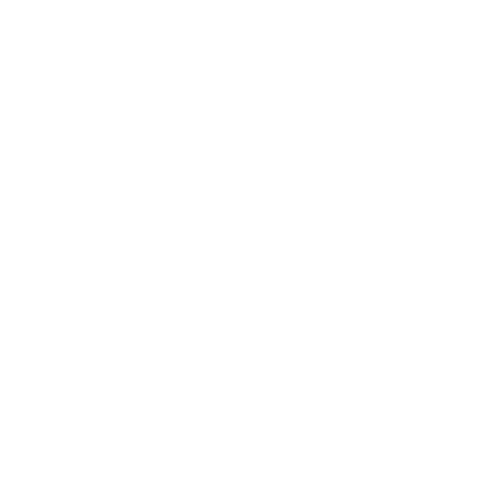

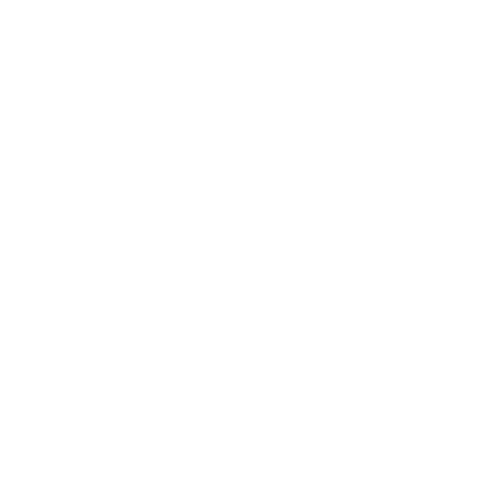

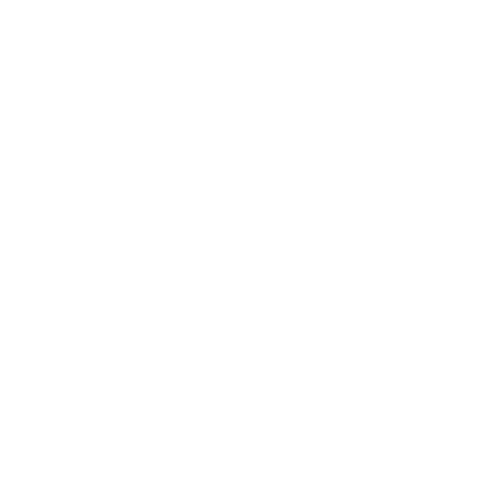

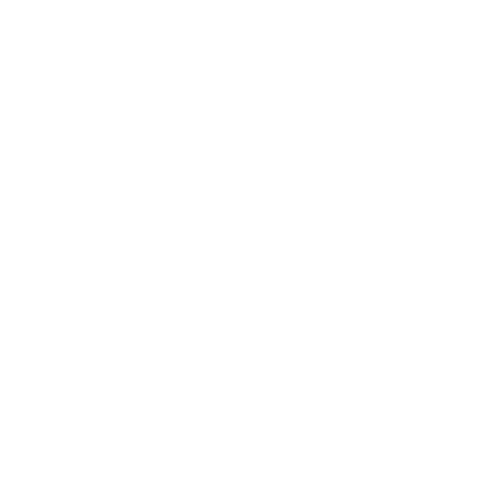

In [5]:
w = interactive(solve_lorentz,angle = (0., 360.), N = (0, 50), sigma = (0.0, 50.0), rho = (0.0, 50.0))
display(w)

In [6]:
t,x_t = w.result 

In [7]:
w.kwargs

{'N': 10,
 'angle': 0.0,
 'max_time': 4.0,
 'sigma': 10.0,
 'beta': 2.6666666666666665,
 'rho': 28.0}